Zredukowanie liczby zmiennych opisujących 3 kategorie win. Z wykorzystankiem drzew decyzyjnych oraz PCA (analiza składowych głównych).
Reducing the number of variables describing 3 categories of wine using decision trees and Principal Component Analysis.

Decision Tree is a supervised learning technique, mostly used for solving Classification problems. PCA is a statistical technique for reducing the dimensionality of a dataset. It is used for 
analyzing large datasets containing a high number of dimensions per observation, increasing the interpretability of data while preserving the maximum amount of information. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from numpy.linalg import eig

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
wina = pd.read_csv('wina.csv', sep = ',', decimal = '.')
X = wina[wina.columns[:-1]]
y = wina[wina.columns[-1]]

In [5]:
from sklearn.preprocessing import StandardScaler
sc_Stand = StandardScaler()
X = sc_Stand.fit_transform(X)

In [6]:
wina.dtypes

x1       float64
x2       float64
x3       float64
x4       float64
x5         int64
x6       float64
x7       float64
x8       float64
x9       float64
x10      float64
x11      float64
x12      float64
x13        int64
class      int64
dtype: object

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)
#70% training and 30% test split

In [8]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train) #training
dt_clf.score(X_test, y_test) #making prediction

y_pred = dt_clf.predict(X_test)
dt_clf.score(X_test, y_pred) #checking the score of the classifier

1.0

In [9]:
y_pred = dt_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
#confusion matrix, main diagonal of the matrix gives results of the correct prediction: 
#1 row - incorrect classification of one wine from category 1 to category 2
#2 row - incorrect classification of one wine from category 2 to category 1 and one wine from category 2 to category 3
print(classification_report(y_test, y_pred))
#f1 values are very close to 1, so model assigned correctly wines to their categories

[[18  1  0]
 [ 1 20  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        19
           2       0.95      0.91      0.93        22
           3       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.94      0.94      0.94        54



In [10]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)

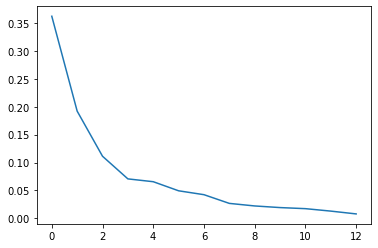

In [11]:
plt.plot(pca.explained_variance_ratio_)

In [12]:
licz_pc = 3 #choice of numbers of the features based on the curve, najwieksze breakdown (either 3 or 7)
ladunki = pca.components_[:licz_pc].T
skladowe = ["PC"+str(i) for i in range(1, licz_pc+1)]
ladunki_df = pd.DataFrame(ladunki, columns = skladowe,
                        index=wina.columns[:-1])
ladunki_df

,PC1,PC2,PC3
x1,0.144329,-0.483652,-0.207383
x2,-0.245188,-0.224931,0.089013
x3,-0.002051,-0.316069,0.626224
x4,-0.239320,0.010591,0.612080
x5,0.141992,-0.299634,0.130757
x6,0.394661,-0.065040,0.146179
x7,0.422934,0.003360,0.150682
x8,-0.298533,-0.028779,0.170368
x9,0.313429,-0.039302,0.149454
x10,-0.088617,-0.529996,-0.137306


In [13]:
X_PCA = pca.transform(X)
X_PCA3 = X_PCA[:,0:3]

In [14]:
X_PCA3

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [15]:
X_PCA3_train, X_PCA3_test, y_PCA3_train, y_PCA3_test = train_test_split(X_PCA3, y, test_size=0.30)

In [16]:
dt_clf3 = tree.DecisionTreeClassifier()
dt_clf3.fit(X_PCA3_train, y_PCA3_train)

DecisionTreeClassifier()

In [17]:
print("3 składowych:", dt_clf3.score(X_PCA3_train, y_PCA3_train))

3 składowych: 1.0


In [18]:
y_PCA3_pred = dt_clf3.predict(X_PCA3_test)

In [19]:
print(confusion_matrix(y_PCA3_test, y_PCA3_pred))
#only one vine from category 1 was incorrectly assigned to category 2
print(classification_report(y_PCA3_test, y_PCA3_pred))
#f1 values increased

[[16  1  0]
 [ 0 22  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.96      1.00      0.98        22
           3       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

